In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:
def generate_model (n):
    """Returns a set of (random) n+1 linear model coefficients."""
    return np.random.rand (n+1, 1)

def generate_data (m, theta, sigma=1.0/(2**0.5)):
    """
    Generates 'm' noisy observations for a linear model whose
    predictor (non-intercept) coefficients are given in 'theta'.
    Decrease 'sigma' to decrease the amount of noise.
    """
    assert (type (theta) is np.ndarray) and (theta.ndim == 2) and (theta.shape[1] == 1)
    n = len (theta)
    X = np.random.rand (m, n)
    X[:, 0] = 1.0
    y = X.dot (theta) + sigma*np.random.randn (m, 1)
    return (X, y)

def estimate_coeffs (X, y):
    """
    Solves X*theta = y by a linear least squares method.
    """
    result = np.linalg.lstsq (X, y, rcond=None)
    theta = result[0]
    return theta

In [3]:
def rel_diff(x, y, ord=2):
    """
    Computes ||x-y|| / ||y||. Uses 2-norm by default;
    override by setting 'ord'.
    """
    return np.linalg.norm (x - y, ord=ord) / np.linalg.norm (y, ord=ord)

In [4]:
m = 100000
n = 1
theta_true = generate_model(n)

(X, y) = generate_data(m, theta_true, sigma=0.1)

print("Condition number of the data matrix:", np.linalg.cond(X))

theta = estimate_coeffs(X, y)
e_rel = rel_diff(theta, theta_true)

print("Relative error:", e_rel)

Condition number of the data matrix: 4.3832346094915415
Relative error: 0.002181676500823149


In [5]:
LAMBDA_MAX = max(np.linalg.eigvals(X.T.dot(X)))
print(LAMBDA_MAX)

126703.73271295597


In [8]:
PHI = 1.99 / LAMBDA_MAX # Fudge factor
rel_diffs = np.zeros((m+1, 1))

theta_k = np.zeros((n+1))
for k in range(m):
    rel_diffs[k] = rel_diff(theta_k, theta_true)
    
    X_k = X[k, :].reshape(-1, 1)
    y_k = y[k]
    
    error = y_k - X_k.T @ theta_k
    
    theta_k = theta_k + PHI * error * X_k
    
theta_lms = theta_k
rel_diffs[m] = rel_diff(theta_lms, theta_true)

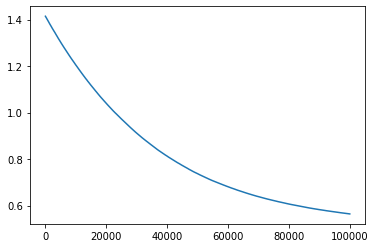

In [10]:
plt.plot(range(len(rel_diffs)), rel_diffs)

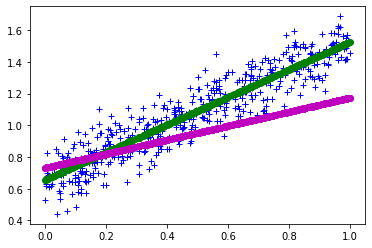

In [11]:
STEP = int(X.shape[0] / 500)
if n == 1:
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.plot(X[::STEP, 1], y[::STEP], 'b+') # blue - data
    ax1.plot(X[::STEP, 1], X.dot(theta_true)[::STEP], 'r*') # red - true
    ax1.plot(X[::STEP, 1], X.dot(theta)[::STEP], 'go') # green - batch
    ax1.plot(X[::STEP, 1], X.dot(theta_lms)[::STEP], 'mo') # magenta - pure LMS
else:
    print("Plot is multidimensional; I live in Flatland, so I don't do that.")